## City of Toronto Bicycle Collisions Data



## Setup Notebook

In [1]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from IPython.display import display
import geopandas as gpd
from shapely.geometry import Point

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

/Users/aaliyashaikh/Library/Python/3.8/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Import GeoJson Data

To begin analyzing bicycle collision data, we first need to load the dataset. The data is stored in GeoJSON format, which contains geographical information that can be processed using a GeoDataFrame in the geopandas library. Below, we import the dataset and display the first few rows to get an overview of the data structure:

In [2]:
# Import dataset as a GeoDataFrame
collision_data = gpd.read_file('../../data_files/Traffic_Collisions_Open_Data_-6024052409346627848.geojson')

collision_data.head()


OBJECTID EVENT_UNIQUE_ID                       OCC_DATE OCC_MONTH  \
0         1  GO-20148000005  Wed, 01 Jan 2014 05:00:00 GMT   January   
1         2  GO-20148000085  Wed, 01 Jan 2014 05:00:00 GMT   January   
2         3  GO-20141260499  Wed, 01 Jan 2014 05:00:00 GMT   January   
3         4  GO-20141260663  Wed, 01 Jan 2014 05:00:00 GMT   January   
4         5  GO-20141261162  Wed, 01 Jan 2014 05:00:00 GMT   January   

     OCC_DOW OCC_YEAR OCC_HOUR DIVISION  FATALITIES INJURY_COLLISIONS  ...  \
0  Wednesday     2014       13      D23           0                NO  ...   
1  Wednesday     2014       19      D42           0                NO  ...   
2  Wednesday     2014        2      NSA           0               YES  ...   
3  Wednesday     2014        3      NSA           0                NO  ...   
4  Wednesday     2014        5      NSA           0               YES  ...   

  HOOD_158                   NEIGHBOURHOOD_158 LONG_WGS84  LAT_WGS84  \
0      006   Kingsview Village-The Westway (6) -79.558639  43.694246   
1      128  Agincourt South-Malvern West (128) -79.281506  43.784746   
2      NSA                                 NSA   0.000000   0.000000   
3      NSA                                 NSA   0.000000   0.000000   
4      NSA                                 NSA   0.000000   0.000000   

   AUTOMOBILE  MOTORCYCLE PASSENGER BICYCLE PEDESTRIAN  \
0         YES          NO        NO      NO         NO   
1         YES          NO        NO      NO         NO   
2         YES          NO        NO      NO         NO   
3         YES          NO        NO      NO         NO   
4         YES          NO        NO      NO         NO   

                     geometry  
0  POINT (-79.55864 43.69425)  
1  POINT (-79.28151 43.78475)  
2     POINT (0.00000 0.00000)  
3     POINT (0.00000 0.00000)  
4     POINT (0.00000 0.00000)  

[5 rows x 22 columns]

We can see that there are a lot of collisions in the City of Toronto. Now let's analyze that data in the dataset. 

## Data Analysis

Let's exploring the collision data columns (features).

In [3]:
# Check the number of columns and rows
collision_data.shape

(704704, 22)

In [4]:
# Check the columns in DataFrame
collision_data.columns

Index(['OBJECTID', 'EVENT_UNIQUE_ID', 'OCC_DATE', 'OCC_MONTH', 'OCC_DOW',
       'OCC_YEAR', 'OCC_HOUR', 'DIVISION', 'FATALITIES', 'INJURY_COLLISIONS',
       'FTR_COLLISIONS', 'PD_COLLISIONS', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'LONG_WGS84', 'LAT_WGS84', 'AUTOMOBILE', 'MOTORCYCLE', 'PASSENGER',
       'BICYCLE', 'PEDESTRIAN', 'geometry'],
      dtype='object')

Based on the Toronto Police Service's Traffic Collisions Open Data (ASR-T-TBL-001), here is a description of each column in the dataset:

- OBJECTID: A unique identifier for each collision record.
- EVENT_UNIQUE_ID: A unique code assigned to each specific event.
- OCC_DATE: The date and time of the collision occurrence.
- OCC_MONTH: The month in which the collision occurred.
- OCC_DOW: The day of the week on which the collision happened.
- OCC_YEAR: The year in which the collision occurred.
- OCC_HOUR: The hour of the day (24-hour format) when the collision took place.
- DIVISION: The division code where the incident was recorded.
- FATALITIES: The number of fatalities resulting from the collision.
- INJURY_COLLISIONS: Indicates whether the collision involved injuries (e.g., "YES" or "NO").
- FTR_COLLISIONS: Indicates whether the collision was a "Fail to Remain" incident.
- PD_COLLISIONS: Indicates whether the collision involved property damage.
- HOOD_158: Numeric code representing the neighborhood where the collision occurred.
- NEIGHBOURHOOD_158: The name of the neighborhood and its associated number.
- LONG_WGS84: Longitude of the collision location (in WGS84 coordinate system).
- LAT_WGS84: Latitude of the collision location (in WGS84 coordinate system).
- AUTOMOBILE: Indicates if an automobile was involved in the collision (e.g., "YES" or "NO").
- MOTORCYCLE: Indicates if a motorcycle was involved in the collision.
- PASSENGER: Indicates if a passenger vehicle was involved in the collision.
- BICYCLE: Indicates if a bicycle was involved in the collision.
- PEDESTRIAN: Indicates if a pedestrian was involved in the collision.
- geometry: A spatial coordinate (likely projected coordinate system) for mapping the location.


In [5]:
# Check data types per column
print(collision_data.dtypes)

OBJECTID                int64
EVENT_UNIQUE_ID        object
OCC_DATE               object
OCC_MONTH              object
OCC_DOW                object
OCC_YEAR               object
OCC_HOUR               object
DIVISION               object
FATALITIES              int64
INJURY_COLLISIONS      object
FTR_COLLISIONS         object
PD_COLLISIONS          object
HOOD_158               object
NEIGHBOURHOOD_158      object
LONG_WGS84            float64
LAT_WGS84             float64
AUTOMOBILE             object
MOTORCYCLE             object
PASSENGER              object
BICYCLE                object
PEDESTRIAN             object
geometry             geometry
dtype: object


In [6]:
# Check numerical statistics for each column
collision_data.describe()

OBJECTID     FATALITIES     LONG_WGS84      LAT_WGS84
count  704704.000000  704704.000000  704704.000000  704704.000000
mean   352352.500000       0.000873     -66.342691      36.528215
std    203430.666387       0.030053      29.423231      16.200397
min         1.000000       0.000000     -79.639247       0.000000
25%    176176.750000       0.000000     -79.444829      43.644346
50%    352352.500000       0.000000     -79.370469      43.692500
75%    528528.250000       0.000000     -79.258521      43.751480
max    704704.000000       3.000000       0.000000      43.853164

Because werw focusing on bicycle collision drop eveeyrhting but bicylcle. 


In [7]:
# Drop columns
collision_data = collision_data.drop(columns=[
    'OBJECTID',               # Unique identifier, not informative for analysis
    'EVENT_UNIQUE_ID',        # Another unique identifier, redundant
    'HOOD_158',               # Numeric code for neighborhoods, redundant with neighborhood name
    'INJURY_COLLISIONS',      # Specific collision categories, may not fit broader analysis
    'NEIGHBOURHOOD_158',      # Redundant if detailed spatial analysis isn't required
    'OCC_MONTH',              # Month derivable from OCC_DATE
    'OCC_YEAR',               # Year derivable from OCC_DATE
    'OCC_DOW',                # Day of week derivable from OCC_DATE
    'DIVISION',               # Redundant for neighborhood-focused analysis
    'PASSENGER',              # Overlaps with automobile classification
    'AUTOMOBILE',             # May be less relevant if focusing on broader vehicle data
    'FATALITIES',             # May not fit broad collision trends
    'FTR_COLLISIONS',         # Specific collision subcategories
    'PD_COLLISIONS',          # Specific collision subcategories
    'MOTORCYCLE',             # May not fit focus of general collision analysis
    'PEDESTRIAN',             # May not fit focus of general collision analysis
], errors='ignore')

# Rename columns in the GeoDataFrame
collision_data.rename(columns={
    'OCC_DATE': 'DATE',            # Rename to better indicate the data's purpose
    'LONG_WGS84': 'LONGITUDE',     # Simplify and clarify the name
    'LAT_WGS84': 'LATITUDE',       # Simplify and clarify the name
    'OCC_HOUR': 'HOUR'             # Rename for consistency
}, inplace=True)

# Check if columns are removed and remaining columns have been renamed
collision_data.columns


Index(['DATE', 'HOUR', 'LONGITUDE', 'LATITUDE', 'BICYCLE', 'geometry'], dtype='object')

## Data Cleaning

Data cleaning for the collision dataset ensures:

- Accuracy: Removes errors and inconsistencies.
- Efficiency: Streamlines the dataset for quicker and easier analysis.
- Reliability: Produces trustworthy insights and recommendations.
- Focus: Tailors the data for the specific analysis of collision patterns and trends.

Given the large size of the traffic collision dataset, it would be inefficient to work with the entire dataset when we're only interested in data from 2019 to 2023. To streamline our analysis, we will filter the dataset to focus solely on the relevant records from these years. This approach reduces the amount of data we're working with and helps optimize processing time. The following code extracts only the collisions that occurred between 2019 and 2023, dropping any other records:

In [8]:
# Convert the 'collision_date' column to datetime (replace 'collision_date' with the actual column name)
collision_data['DATE'] = pd.to_datetime(collision_data['DATE'])

# Filter data from 2019 to 2023 and drop all other entries
collision_data_filtered = collision_data[(collision_data['DATE'].dt.year >= 2014) & 
                                         (collision_data['DATE'].dt.year <= 2023)]

# Verify the results by displaying the first few rows
collision_data_filtered.head()


DATE HOUR  LONGITUDE   LATITUDE BICYCLE  \
0 2014-01-01 05:00:00   13 -79.558639  43.694246      NO   
1 2014-01-01 05:00:00   19 -79.281506  43.784746      NO   
2 2014-01-01 05:00:00    2   0.000000   0.000000      NO   
3 2014-01-01 05:00:00    3   0.000000   0.000000      NO   
4 2014-01-01 05:00:00    5   0.000000   0.000000      NO   

                     geometry  
0  POINT (-79.55864 43.69425)  
1  POINT (-79.28151 43.78475)  
2     POINT (0.00000 0.00000)  
3     POINT (0.00000 0.00000)  
4     POINT (0.00000 0.00000)

Before proceeding with any analysis, it's important to check the dataset for missing values. Missing or incomplete data can lead to inaccurate results or errors in processing. The following code will help us identify if there are any missing values in the traffic collision dataset and show the number of missing entries for each column:

In [9]:
# Check for missing values
print(collision_data_filtered.isnull().sum())

# Drop rows with any NaN values
collision_data_clean = collision_data_filtered.dropna()

# Verify the result by checking the number of missing values after dropping NaNs
print(collision_data_clean.isnull().sum())

DATE         0
HOUR         0
LONGITUDE    0
LATITUDE     0
BICYCLE      4
geometry     0
dtype: int64
DATE         0
HOUR         0
LONGITUDE    0
LATITUDE     0
BICYCLE      0
geometry     0
dtype: int64


Although there are no missing values there are several collisions that dont have coordinates or have 'no'.

In [10]:
# Drop rows where LONGITUDE or LATITUDE values are 0 or BICYCLE is 'NO' or 'N/R'
collision_data_bicycles = collision_data_filtered[
    (collision_data_filtered['LONGITUDE'] != 0) & 
    (collision_data_filtered['LATITUDE'] != 0) & 
    (collision_data_filtered['BICYCLE'] != 'NO') &
    (collision_data_filtered['BICYCLE'] != 'N/R')
]

# Verify the results by displaying the first few rows
collision_data_bicycles.head()

DATE HOUR  LONGITUDE   LATITUDE BICYCLE  \
89   2014-01-02 05:00:00   18 -79.380272  43.648644     YES   
351  2014-01-03 05:00:00   11 -79.399845  43.652539     YES   
1857 2014-01-09 05:00:00   13 -79.405167  43.656966     YES   
1891 2014-01-09 05:00:00    5 -79.480613  43.665578     YES   
2271 2014-01-12 05:00:00   22 -79.377892  43.649143     YES   

                        geometry  
89    POINT (-79.38027 43.64864)  
351   POINT (-79.39984 43.65254)  
1857  POINT (-79.40517 43.65697)  
1891  POINT (-79.48061 43.66558)  
2271  POINT (-79.37789 43.64914)

** EXPLAIN WHY IM DROPPING THE COLLISIONS WITH POINT (0,0)

Since there is no missing data, we don't need to handle any specific missing values. 

To get an overview of the size of the dataset, it's useful to check the number of rows and columns it contains. The following code will display the shape of the traffic collision dataset, which will tell us how many entries (rows) and features (columns) are present:

In [11]:
collision_data_bicycles.shape

(9393, 6)

Initially, I planned to remove duplicates as part of the data cleaning process. However, it's not advisable to drop duplicates in this dataset because multiple collisions can occur at the same time or at the same geographical coordinates (longitude and latitude). To ensure the integrity of the data, I chose not to remove any duplicates. I would typically  also remove outliers using the Interquartile Range method. However, outliers in traffic collision datasets often represent rare but significant events that can provide valuable insights. Removing these data points without careful consideration might undermine the depth and accuracy of the analysis, potentially overlooking critical patterns or impactful incidents.

That is all for data cleaning, let's see the new size of the dataset.

In [12]:
# View DataFrame
collision_data_bicycles.tail()

DATE HOUR  LONGITUDE   LATITUDE BICYCLE  \
652614 2023-12-29 05:00:00   18 -79.251249  43.718836     YES   
652678 2023-12-29 05:00:00    9 -79.422689  43.654396     YES   
652848 2023-12-30 05:00:00   13 -79.388216  43.666811     YES   
652851 2023-12-30 05:00:00   11 -79.273974  43.822500     YES   
652881 2023-12-31 05:00:00   12 -79.429433  43.652967     YES   

                          geometry  
652614  POINT (-79.25125 43.71884)  
652678  POINT (-79.42269 43.65440)  
652848  POINT (-79.38822 43.66681)  
652851  POINT (-79.27397 43.82250)  
652881  POINT (-79.42943 43.65297)

In [13]:
output_path = "../Clean Data/collision_data.geojson"
collision_data_bicycles.to_file(output_path, driver="GeoJSON")

## Visualization of Filtered Dataset

To visualize the traffic collision data, we can use the folium library, which allows for interactive mapping with geographical data. In this section, we'll create a base map centered on Toronto and overlay the traffic collision data from the GeoJSON file. The following code ensures that the data is correctly loaded and visualized on the map, with error handling to check for any issues with the file path:

In [13]:
# Define Toronto's latitude and longitude
#toronto_coords = [43.65107, -79.347015]

# Create a folium map centered on Toronto
#m = folium.Map(location=toronto_coords, zoom_start=12)

# Add each collision from collision_data_filtered to the map
#for _, row in collision_data_filtered.iterrows():
    #folium.CircleMarker(
       # location=[row['LATITUDE'], row['LONGITUDE']],
       # radius=1,  # Size of the marker
       # color='blue',  # Border color
      #  fill=True,
      #  fill_color='blue',  # Fill color
      #  fill_opacity=0.6  # Transparency
    #).add_to(m)

# Add a layer control panel
#folium.LayerControl().add_to(m)

# Display the map
#m

We can see that there are a lot of collisions in the City of Toronto. Now let's analyze that data in the dataset. 

## Exploratory Data Analysis of Collisions Data from 2019 to 2023

### Extracted Time Features from Collision Data

After converting the `DATE` column to a proper datetime format, we extracted several time-based attributes to analyze collision patterns more effectively. The following features were derived:

1. **Year**: The year in which the collision occurred.
2. **Month**: The month of the collision (1 = January, 12 = December).
3. **Day of the Week**: The name of the day (e.g., Monday, Tuesday).
4. **Hour**: The hour of the day when the collision occurred (0-23).

These features allow for temporal analysis of the data, such as identifying trends over years, seasonal patterns, or the most common days and hours for collisions. For example, examining collisions by the day of the week can help identify whether weekdays or weekends experience more accidents, while the hour attribute can reveal peak traffic or high-risk hours.


In [27]:
# Ensure the DATE column is in datetime format
collision_data_bicycles['DATE'] = pd.to_datetime(collision_data_bicycles['DATE'], errors='coerce')

# Extract year, month, and day of the week
collision_data_bicycles['Year'] = collision_data_bicycles['DATE'].dt.year
collision_data_bicycles['Month'] = collision_data_bicycles['DATE'].dt.month
collision_data_bicycles['Day Of Week'] = collision_data_bicycles['DATE'].dt.day_name()

# Drop the time portion in the DATE column
collision_data_bicycles['DATE'] = collision_data_bicycles['DATE'].dt.date

# Display the filtered DataFrame
collision_data_bicycles.head()

DATE HOUR  LONGITUDE   LATITUDE BICYCLE  \
355541  2019-01-03   14 -79.254308  43.780015     YES   
355819  2019-01-04   18 -79.418322  43.655232     YES   
355836  2019-01-04   11 -79.406016  43.652310     YES   
356233  2019-01-07   13 -79.443087  43.678021     YES   
356435  2019-01-08   17 -79.439854  43.639946     YES   

                          geometry  Year  Month Day Of Week  
355541  POINT (-79.25431 43.78002)  2019      1    Thursday  
355819  POINT (-79.41832 43.65523)  2019      1      Friday  
355836  POINT (-79.40602 43.65231)  2019      1      Friday  
356233  POINT (-79.44309 43.67802)  2019      1      Monday  
356435  POINT (-79.43985 43.63995)  2019      1     Tuesday

### Yearly Collision Trends Analysis

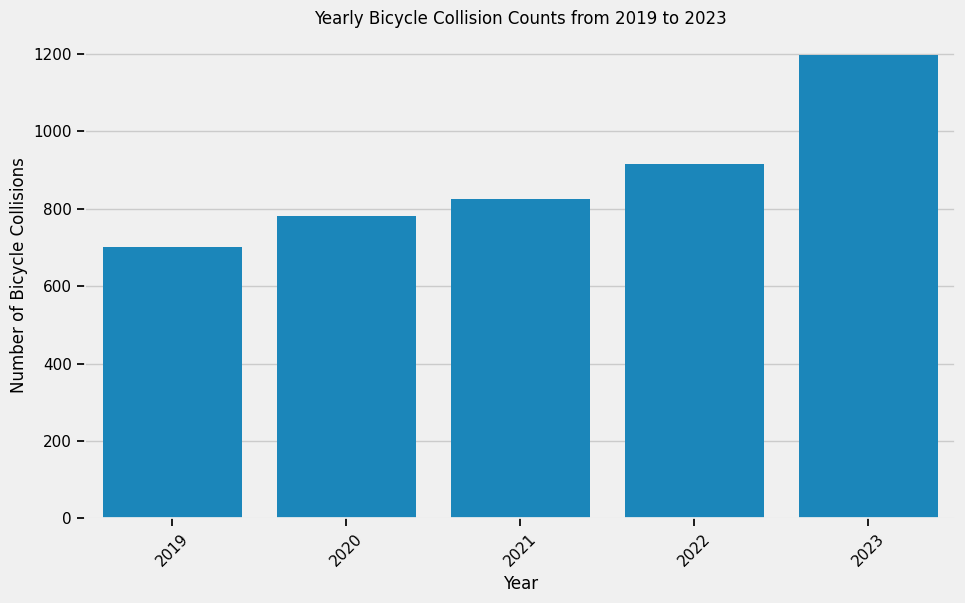

In [28]:
# Plot collisions per year from 2019 to 2023 for bicycles only
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=collision_data_bicycles)
plt.title('Yearly Bicycle Collision Counts from 2019 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Bicycle Collisions')
plt.xticks(rotation=45)
plt.show()


### Monthly Collision Patterns 


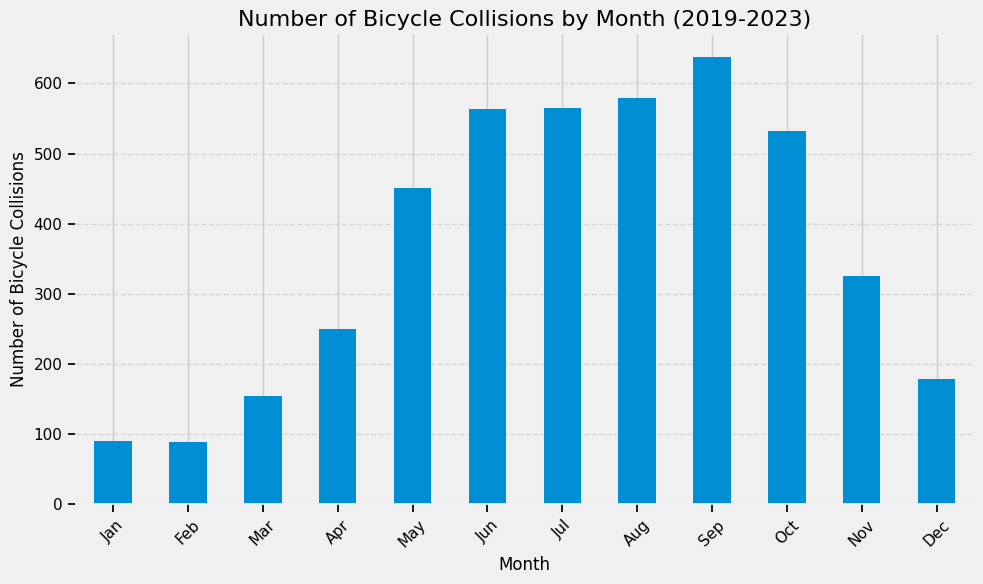

In [29]:
# Plot collisions per month
plt.figure(figsize=(10, 6))
collision_data_bicycles["Month"].value_counts(sort=False).plot(kind="bar")
plt.title("Number of Bicycle Collisions by Month (2019-2023)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Bicycle Collisions", fontsize=12)
plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

#### Relationship between Month and Year

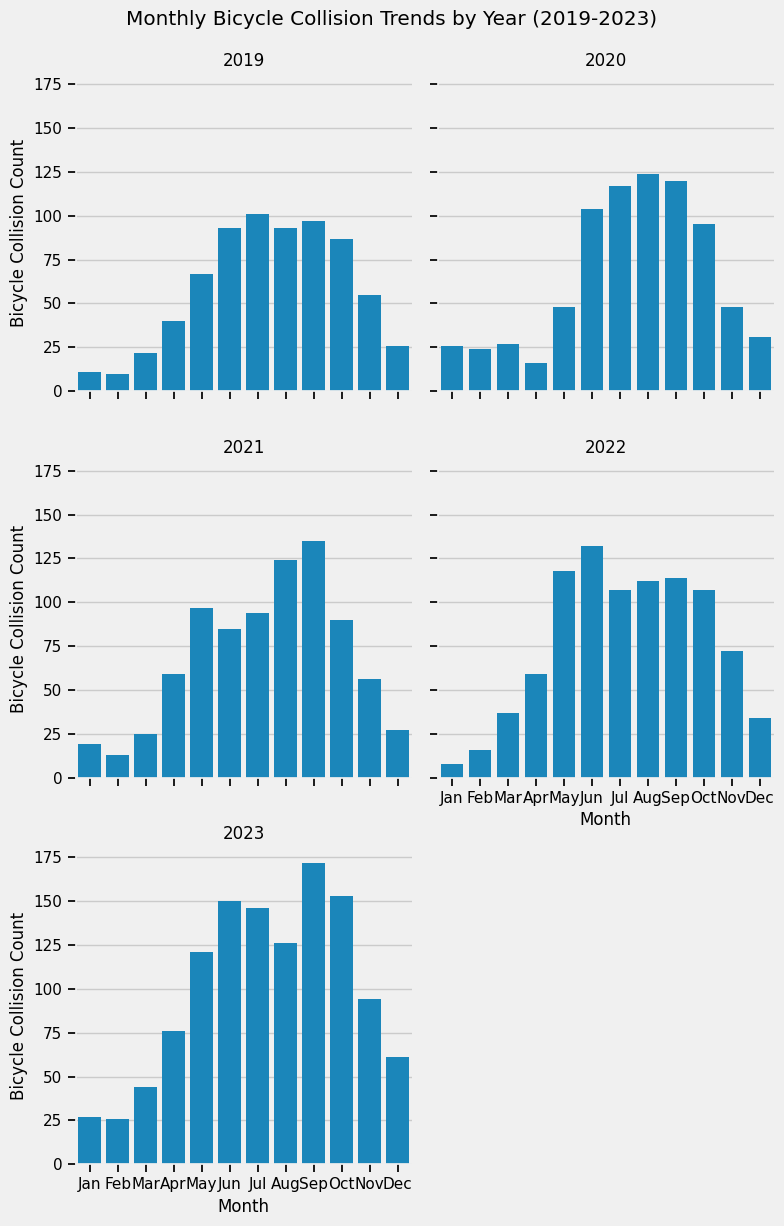

In [40]:
# Create separate plots for each year showing monthly collision counts
g = sns.FacetGrid(monthly_trends, col="Year", col_wrap=2, height=4, sharey=True)
g.map(sns.barplot, "Month", "Bicycle_Collision_Count", order=range(1, 13))

# Set titles and labels
g.set_axis_labels("Month", "Bicycle Collision Count")
g.set_titles("{col_name}")
g.fig.suptitle("Monthly Bicycle Collision Trends by Year (2019-2023)", y=1.02)

# Adjust x-axis to show month names
g.set(xlabel="Month", xticks=range(12), xticklabels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.show()

### Day of the Week Collision Pattern

To further analyze collision patterns, we will examine how collisions are distributed across different days of the week. This analysis can help uncover trends related to weekly activities, such as increased traffic on weekdays due to work commutes or higher collision counts on weekends due to leisure travel. By visualizing these patterns, we can better understand how daily behaviors influence road safety and identify high-risk days for implementing targeted interventions.

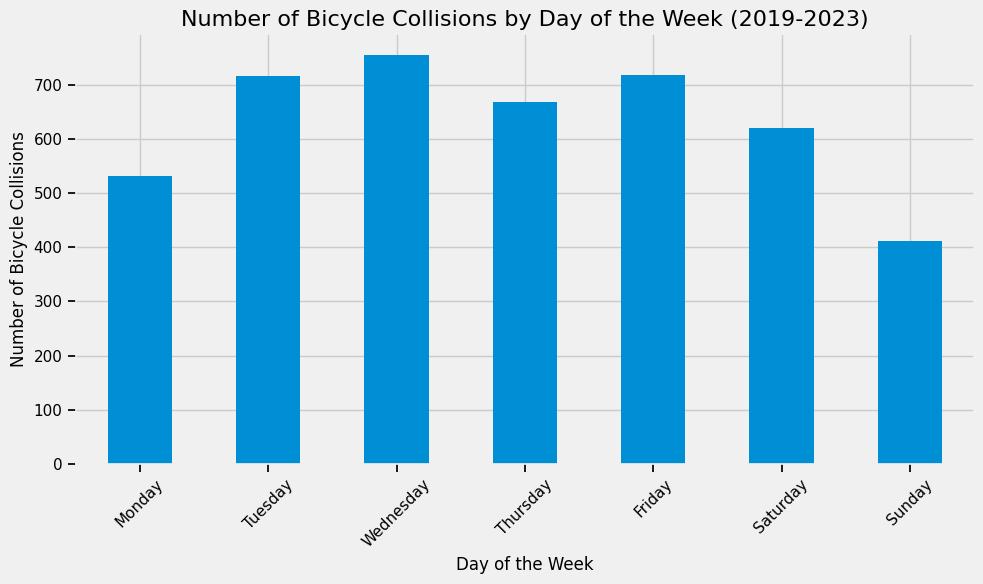

In [32]:
# Count the number of collisions for each day of the week
collisions_by_day = collision_data_bicycles['Day Of Week'].value_counts()

# Reorder the days to follow the traditional weekly order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
collisions_by_day = collisions_by_day.reindex(day_order)

# Plot the data
plt.figure(figsize=(10, 6))
collisions_by_day.plot(kind='bar')
plt.title('Number of Bicycle Collisions by Day of the Week (2019-2023)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Bicycle Collisions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the graph
plt.show()

###  Time of the Day Collision Patterns

This section of the analysis focuses on understanding the hourly patterns of traffic collisions. By examining how collisions are distributed across different hours of the day, we can identify peak times when accidents are most likely to occur. This insight is critical for implementing targeted traffic safety measures, optimizing resource allocation for emergency responders, and improving road safety during high-risk periods. The following code aggregates collision data by hour and visualizes these patterns to uncover meaningful trends.

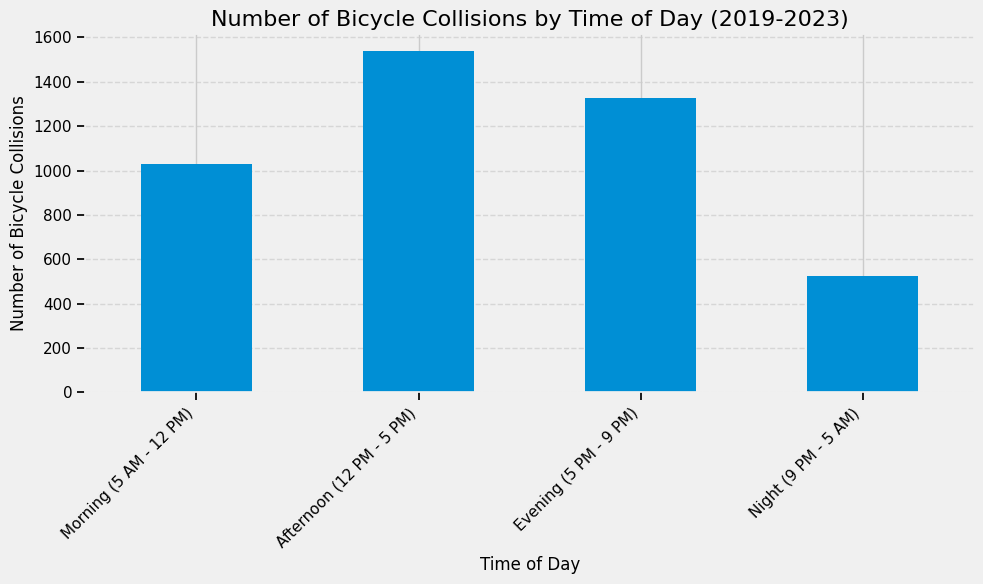

In [33]:
# Ensure the 'HOUR' column is converted to integers
collision_data_bicycles['HOUR'] = collision_data_bicycles['HOUR'].astype(int)

# Define time categories based on the hour of the day
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning (5 AM - 12 PM)'
    elif 12 <= hour < 17:
        return 'Afternoon (12 PM - 5 PM)'
    elif 17 <= hour < 21:
        return 'Evening (5 PM - 9 PM)'
    else:
        return 'Night (9 PM - 5 AM)'

# Apply the time categorization to the 'HOUR' column
collision_data_bicycles['TIME_OF_DAY'] = collision_data_bicycles['HOUR'].apply(categorize_time)

# Count collisions for each time category
collisions_by_time_of_day = collision_data_bicycles['TIME_OF_DAY'].value_counts()

# Reorder categories for logical time progression
time_order = ['Morning (5 AM - 12 PM)', 'Afternoon (12 PM - 5 PM)', 'Evening (5 PM - 9 PM)', 'Night (9 PM - 5 AM)']
collisions_by_time_of_day = collisions_by_time_of_day.reindex(time_order)

# Plot the data
plt.figure(figsize=(10, 6))
collisions_by_time_of_day.plot(kind='bar')
plt.title('Number of Bicycle Collisions by Time of Day (2019-2023)', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Bicycle Collisions', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the graph
plt.show()


## Import Ward Data

To predict the number of collisions in Toronto, the collision data must be spatially joined with the ward boundaries to determine which ward each collision occurred in. This process involves using the geographic coordinates (latitude and longitude) from the collision data and mapping them to the corresponding ward polygons in the ward dataset. After assigning collisions to their respective wards, we can aggregate the number of collisions per ward to identify trends and high-risk areas. This data can then be enriched with additional ward-specific features, such as population, road density, and traffic volume, to build a predictive model. By training a machine learning model with these features, we can forecast collision counts and provide actionable insights for city planning and traffic safety improvements.

In [56]:
# Load the GeoJSON file generated 
ward_data = gpd.read_file('../../CME538_Big-Project_Hackstreet-Boys/Clean Data/wards_data.geojson')  

# Create a base map centered around the data's average coordinates
center = [ward_data.geometry.centroid.y.mean(), ward_data.geometry.centroid.x.mean()]
m = folium.Map(location=center, zoom_start=12)

# Add the GeoJSON layer to the map
folium.GeoJson(ward_data).add_to(m)

m


## Ward Data Analysis 

In [57]:
# View geoDataFrame
ward_data.head()

AREA_ID AREA_TYPE AREA_S_CD            AREA_NAME           X          Y  \
0  2551040      WD18        16      Don Valley East  318237.290  4844000.0   
1  2551044      WD18        03  Etobicoke-Lakeshore  303099.474  4831000.0   
2  2551048      WD18        15      Don Valley West  314825.876  4843000.0   
3  2551052      WD18        23    Scarborough North  324522.149  4852000.0   
4  2551056      WD18        11  University-Rosedale  313306.543  4837000.0   

   LONGITUDE   LATITUDE                                           geometry  
0  -79.33298  43.739716  POLYGON ((-79.31335 43.71699, -79.31950 43.715...  
1  -79.52087  43.621646  POLYGON ((-79.49777 43.65198, -79.49725 43.651...  
2  -79.37536  43.728396  POLYGON ((-79.35232 43.71573, -79.35209 43.715...  
3  -79.25467  43.809672  POLYGON ((-79.22591 43.83960, -79.22556 43.839...  
4  -79.39432  43.671139  POLYGON ((-79.39004 43.69050, -79.39004 43.690...

In [58]:
# Check the number of columns and rows
ward_data.shape

(25, 9)

In [59]:
# Check the columns in DataFrame
ward_data.columns

Index(['AREA_ID', 'AREA_TYPE', 'AREA_S_CD', 'AREA_NAME', 'X', 'Y', 'LONGITUDE',
       'LATITUDE', 'geometry'],
      dtype='object')

The columns describe the following:
- 'AREA_ID': A unique identifier for each ward in the dataset.
- 'AREA_TYPE': Indicates the type of area (all is WD18 for wards in the 2018 model of Toronto).
- 'AREA_S_CD': A short code representing the ward, likely numeric.
- 'AREA_L_CD': A longer code that may provide additional context or differentiation for the ward.
- 'AREA_NAME': The official name of the ward.
- X,y : coordiantes in a projected coordinate system.
- Longitude, Latitude: Geographic lat and long of the ward's approximate center.
  


## Ward Data Cleaning

Since the data was already cleaned lets just drop columns we don't need

In [60]:
# Drop unnecessary columns 
ward_data = ward_data.drop(columns = ['AREA_ID', 'AREA_S_CD', 'X', 'Y', 'LONGITUDE', 'LATITUDE'], errors='ignore')

# Check the columnsare dropped in geoDataFrame
ward_data.columns

Index(['AREA_TYPE', 'AREA_NAME', 'geometry'], dtype='object')

In [61]:
# View geoDataFrame
ward_data.head()

AREA_TYPE            AREA_NAME  \
0      WD18      Don Valley East   
1      WD18  Etobicoke-Lakeshore   
2      WD18      Don Valley West   
3      WD18    Scarborough North   
4      WD18  University-Rosedale   

                                            geometry  
0  POLYGON ((-79.31335 43.71699, -79.31950 43.715...  
1  POLYGON ((-79.49777 43.65198, -79.49725 43.651...  
2  POLYGON ((-79.35232 43.71573, -79.35209 43.715...  
3  POLYGON ((-79.22591 43.83960, -79.22556 43.839...  
4  POLYGON ((-79.39004 43.69050, -79.39004 43.690...

## Overlay Collision Data onto Ward Data 


In [62]:
# Convert collision data to GeoDataFrame
collision_data_bicycles["geometry"] = collision_data_bicycles.apply(lambda row: Point(row["LONGITUDE"], row["LATITUDE"]), axis=1)
collision_data_bicycles = gpd.GeoDataFrame(collision_data_bicycles, geometry="geometry", crs="EPSG:4326")

In [63]:
# Ensure CRS matches
if collision_data_bicycles.crs != ward_data.crs:
    collision_data_bicycles = collision_data_bicycles.to_crs(ward_data.crs)

# Visualize on a map
map_wards = folium.Map(location=[43.7, -79.4], zoom_start=11)
ward_data_json = ward_data.to_json()
folium.GeoJson(ward_data_json, name="Wards").add_to(map_wards)

# Add collision points
for _, row in collision_data_bicycles.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=1,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6
    ).add_to(map_wards)

map_wards

In [67]:
# Perform the spatial join to find which ward each collision occurred in
collision_with_wards = gpd.sjoin(collision_data_bicycles, ward_data, how="left", op="within")

# Drop unnecessary geometry columns for tabular display
collision_table = collision_with_wards.drop(columns=["geometry", "index_right"])

# Rename columns in the GeoDataFrame
collision_table.rename(columns={
    'AREA_TYPE': 'Ward_Number',           
    'AREA_NAME': 'Ward_Name'
}, inplace=True)

# Display the table in the notebook
collision_table.tail()  # Display first few rows of the table

DATE  HOUR  LONGITUDE   LATITUDE BICYCLE  Year  Month  \
652614  2023-12-29    18 -79.251249  43.718836     YES  2023     12   
652678  2023-12-29     9 -79.422689  43.654396     YES  2023     12   
652848  2023-12-30    13 -79.388216  43.666811     YES  2023     12   
652851  2023-12-30    11 -79.273974  43.822500     YES  2023     12   
652881  2023-12-31    12 -79.429433  43.652967     YES  2023     12   

       Day Of Week               TIME_OF_DAY Ward_Number  \
652614      Friday     Evening (5 PM - 9 PM)        WD18   
652678      Friday    Morning (5 AM - 12 PM)        WD18   
652848    Saturday  Afternoon (12 PM - 5 PM)        WD18   
652851    Saturday    Morning (5 AM - 12 PM)        WD18   
652881      Sunday  Afternoon (12 PM - 5 PM)        WD18   

                    Ward_Name  
652614  Scarborough Southwest  
652678    University-Rosedale  
652848         Toronto Centre  
652851      Scarborough North  
652881              Davenport

In [33]:

# Convert 'DATE' field to string to avoid compatibility issues
if 'DATE' in collision_table.columns:
    collision_table['DATE'] = collision_table['DATE'].astype(str)

# Ensure 'geometry' column exists for GeoDataFrame compatibility
if 'geometry' not in collision_table.columns:
    collision_table['geometry'] = collision_table.apply(
        lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1
    )

# Convert to GeoDataFrame
collision_table_geo = gpd.GeoDataFrame(collision_table, geometry=collision_table['geometry'], crs="EPSG:4326")

# Save the GeoDataFrame to a GeoJSON file
output_geojson_path = "collision_data_with_wards.geojson"
collision_table_geo.to_file(output_geojson_path, driver="GeoJSON")


## Exploratory Data Analysis with Bicyle Collision and Ward Data (2019 to 2023)



### Bicycle Collisions Across Wards from 2019 to 2023

In [66]:
# Rename columns in the GeoDataFrame
collision_table.rename(columns={
    'AREA_L_CD': 'Ward_Number',           
    'AREA_NAME': 'Ward_Name'
}, inplace=True)

# Group collisions by ward number and name, maintaining chronological order
ward_collision_counts = collision_table.groupby(["Ward_Number", "Ward_Name"]).size().reset_index(name="Number of Collisions")

# Sort wards in ascending order by ward number
ward_collision_counts = ward_collision_counts.sort_values(by="Ward_Number")

# Calculate the percentage of collisions for each ward
total_collisions = ward_collision_counts["Number of Collisions"].sum()
ward_collision_counts["Percentage of Collisions"] = (ward_collision_counts["Number of Collisions"] / total_collisions) * 100

# Display the summary DataFrame
ward_collision_counts.head(25)

Ward_Number                 Ward_Name  Number of Collisions  \
0         WD18         Beaches-East York                   175   
22        WD18                Willowdale                    78   
21        WD18       University-Rosedale                   525   
20        WD18        Toronto-St. Paul's                   137   
19        WD18          Toronto-Danforth                   305   
18        WD18            Toronto Centre                   474   
17        WD18         Spadina-Fort York                   671   
16        WD18    Scarborough-Rouge Park                    59   
15        WD18     Scarborough-Guildwood                    64   
14        WD18     Scarborough-Agincourt                   112   
13        WD18     Scarborough Southwest                   105   
23        WD18               York Centre                   119   
12        WD18         Scarborough North                    93   
10        WD18        Parkdale-High Park                   240   
9         WD18  Humber River-Black Creek                    71   
8         WD18       Etobicoke-Lakeshore                   177   
7         WD18           Etobicoke North                    97   
6         WD18          Etobicoke Centre                   105   
5         WD18         Eglinton-Lawrence                    91   
4         WD18           Don Valley West                    68   
3         WD18          Don Valley North                    48   
2         WD18           Don Valley East                    47   
1         WD18                 Davenport                   303   
11        WD18        Scarborough Centre                   122   
24        WD18         York South-Weston                   123   

    Percentage of Collisions  
0                   3.969154  
22                  1.769109  
21                 11.907462  
20                  3.107281  
19                  6.917668  
18                 10.750737  
17                 15.218870  
16                  1.338172  
15                  1.451576  
14                  2.540259  
13                  2.381492  
23                  2.699025  
12                  2.109322  
10                  5.443411  
9                   1.610342  
8                   4.014516  
7                   2.200045  
6                   2.381492  
5                   2.063960  
4                   1.542300  
3                   1.088682  
2                   1.066001  
1                   6.872307  
11                  2.767067  
24                  2.789748

To ensure that the results of our analysis are preserved and can be used for further processing or sharing, we can save the generated table into a GeoJson file

In [35]:
# Convert the DataFrame to a GeoDataFrame
ward_collision_counts_gdf = gpd.GeoDataFrame(
    ward_collision_counts,
    geometry=collision_with_wards.geometry,  # Use the geometry from collision_with_wards
    crs="EPSG:4326"  # Define the coordinate reference system
)

# Save the GeoDataFrame as a GeoJSON file
output_geojson = "collisions_across_wards.geojson"
ward_collision_counts_gdf.to_file(output_geojson, driver="GeoJSON")

To gain a deeper understanding of how traffic collisions are distributed across all wards over time, we can visualize the number of collisions in each ward for every year from 2019 to 2023. This analysis highlights trends and patterns, such as whether certain wards consistently experience higher collision rates or if specific years saw significant changes in collision counts for particular wards. By breaking down the data by year, we can identify temporal variations and focus on wards that may require targeted traffic safety interventions. The following graph provides a comprehensive view of collision trends across all wards over the five-year period.

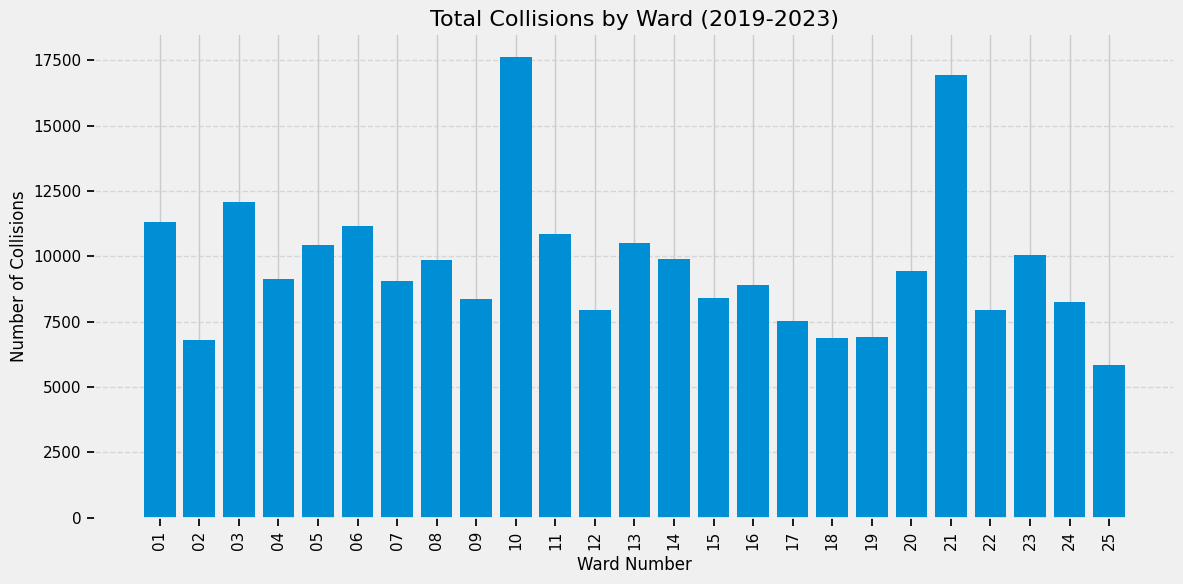

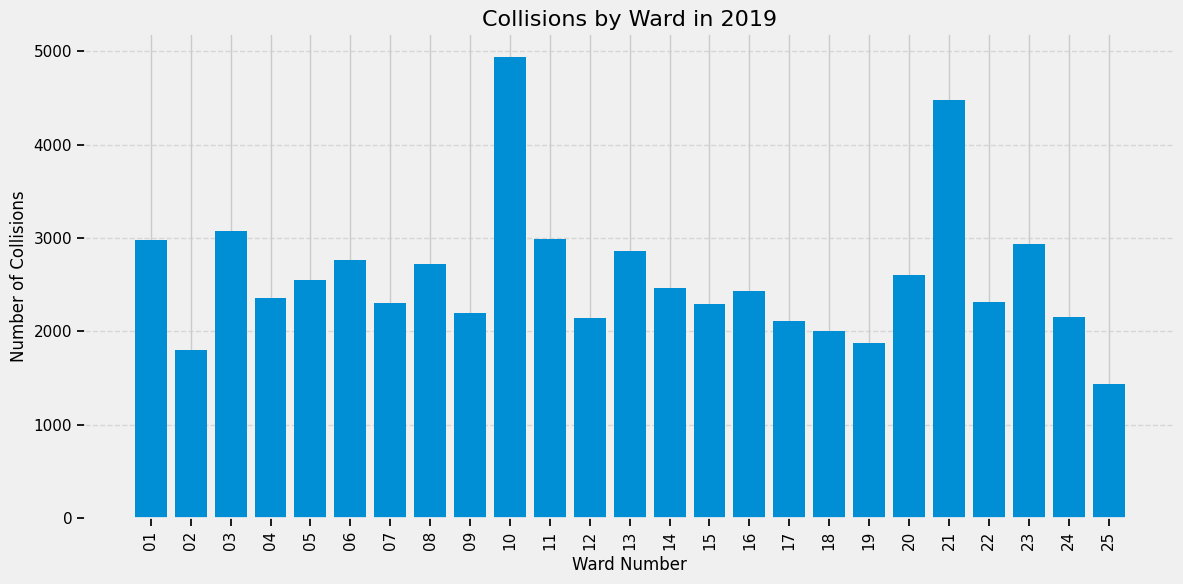

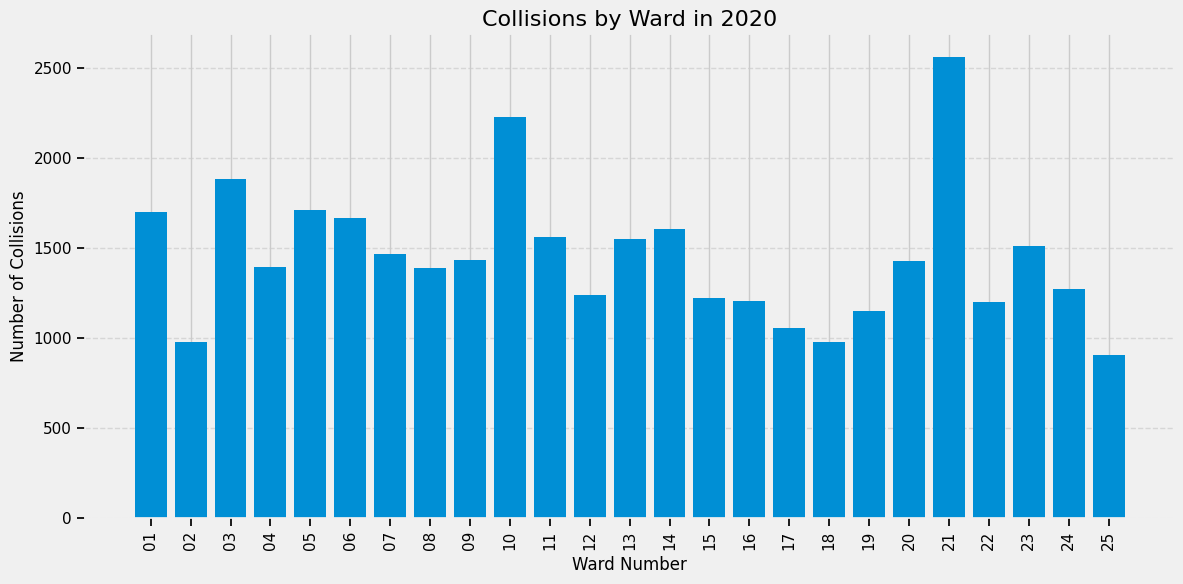

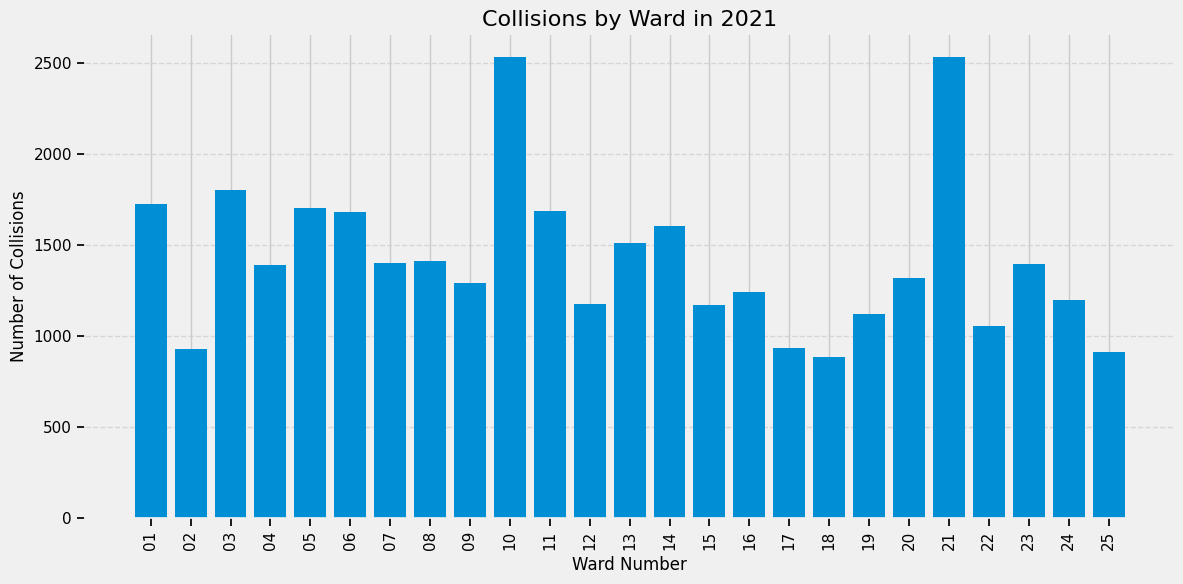

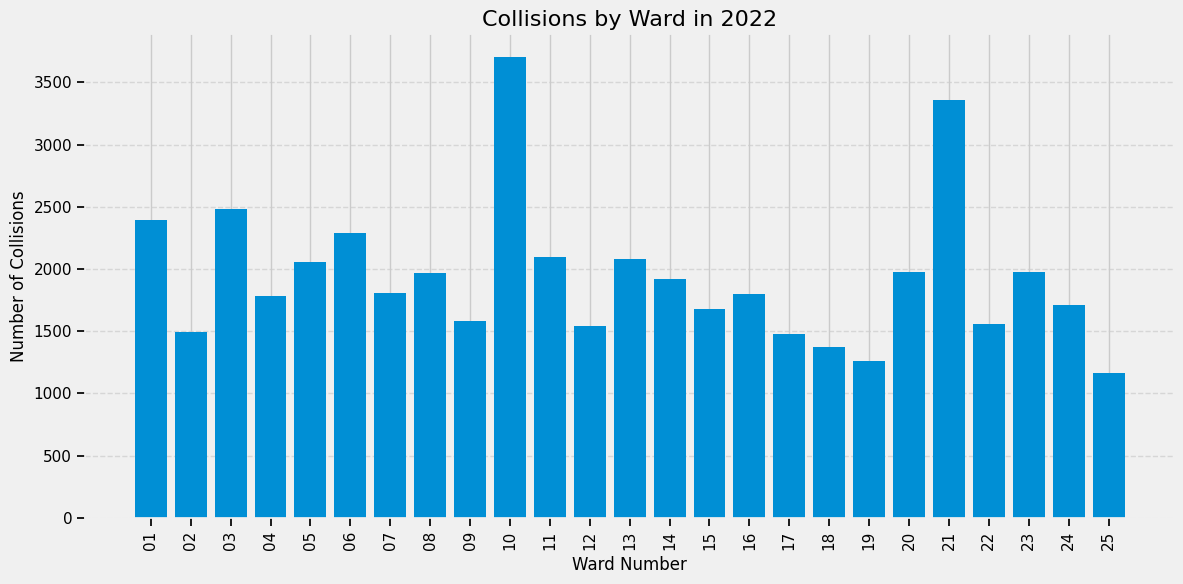

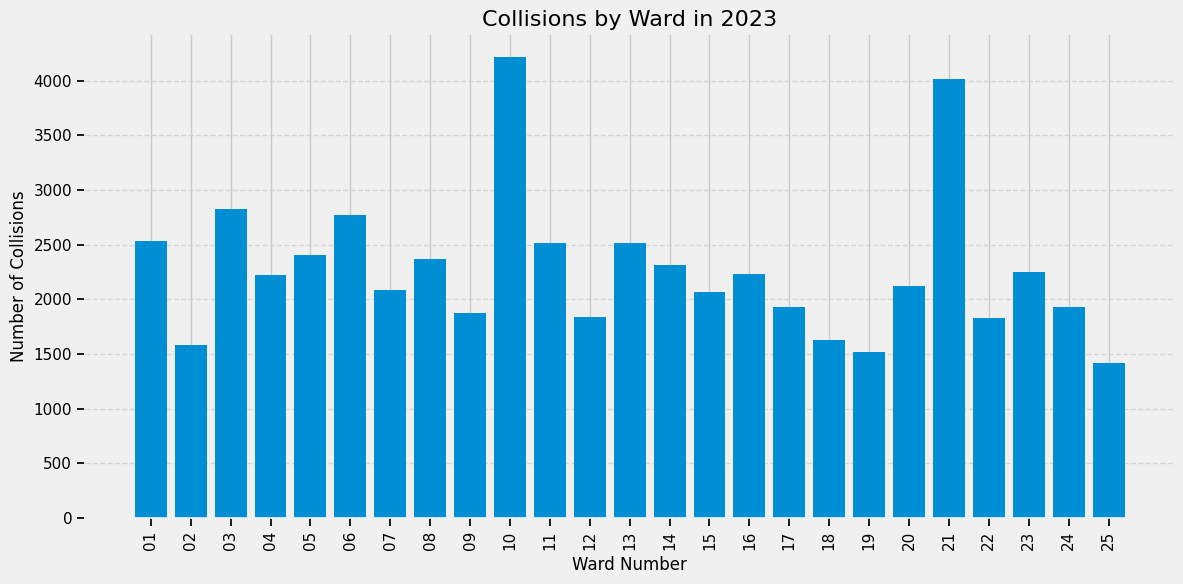

In [36]:
# Ensure the Year column exists and is numeric
collision_table['Year'] = pd.to_datetime(collision_table['DATE']).dt.year

# General graph: Total collisions by ward across all years
general_summary = collision_table.groupby(["Ward_Number", "Ward_Name"]).size().reset_index(name="Total Collisions")
general_summary = general_summary.sort_values(by="Ward_Number")

plt.figure(figsize=(12, 6))
plt.bar(general_summary["Ward_Number"], general_summary["Total Collisions"])
plt.title("Total Collisions by Ward (2019-2023)", fontsize=16)
plt.xlabel("Ward Number", fontsize=12)
plt.ylabel("Number of Collisions", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a graph for each year
for year in range(2019, 2024):
    yearly_data = collision_table[collision_table['Year'] == year]
    yearly_summary = yearly_data.groupby(["Ward_Number", "Ward_Name"]).size().reset_index(name="Collisions")
    yearly_summary = yearly_summary.sort_values(by="Ward_Number")
    
    plt.figure(figsize=(12, 6))
    plt.bar(yearly_summary["Ward_Number"], yearly_summary["Collisions"])
    plt.title(f"Collisions by Ward in {year}", fontsize=16)
    plt.xlabel("Ward Number", fontsize=12)
    plt.ylabel("Number of Collisions", fontsize=12)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


The first bar chart illustrates the total number of traffic collisions by ward in Toronto from 2019 to 2023. It reveals notable differences in collision frequency across the wards. Ward 10 and Ward 21 stand out as having the highest number of collisions, exceeding 17,000, indicating potential hotspots for traffic incidents. Conversely, some wards, such as Ward 2 and Ward 25, have significantly fewer collisions, with counts well below 10,000. This distribution suggests that traffic density, road infrastructure, and possibly ward-specific characteristics like population or commuting patterns play a significant role in influencing collision rates. These insights can be used to prioritize traffic safety measures and allocate resources more effectively in high-collision wards.

The second bar chart illustrates the number of traffic collisions by ward in Toronto for the year 2019. It reveals that Ward 10 and Ward 21 experienced the highest number of collisions, with counts exceeding 4,500. These wards stand out as potential areas of concern requiring focused traffic safety interventions. In contrast, Ward 2 and Ward 25 recorded significantly fewer collisions, with totals closer to 1,500, indicating relatively safer conditions or less traffic density in these areas. Most other wards demonstrate moderate collision frequencies, ranging between 2,000 and 3,500. This distribution highlights the variation in traffic collision patterns across the city, potentially influenced by factors such as population density, road infrastructure, and commuter behavior. These insights can guide city planners in prioritizing safety improvements for high-collision wards.

The third bar chart illustrates the number of traffic collisions by ward in Toronto for the year 2020. Compared to 2019, a noticeable reduction in collision counts is observed, likely due to the impacts of the COVID-19 pandemic and associated lockdowns, which significantly reduced traffic volumes across the city. Despite the overall decrease, Ward 21 remains a hotspot with the highest number of collisions, exceeding 2,500, followed by Ward 10. In contrast, Ward 2 and Ward 25 again recorded the lowest number of collisions, each with totals below 1,000. Other wards experienced moderate collision frequencies, reflecting consistent patterns of activity relative to traffic distribution. These insights highlight the persistent traffic risks in high-collision wards, even during periods of reduced road activity.

The fourth bar chart illustrates the number of traffic collisions by ward in Toronto for the year 2021. Compared to previous years, there is a noticeable increase in collision counts as traffic volumes began returning to pre-pandemic levels. Ward 10 and Ward 21 remain the most collision-prone areas, with counts exceeding 2,500, reflecting consistent traffic activity or infrastructure challenges in these wards. Conversely, Ward 2 and Ward 25 continue to experience the fewest collisions, with totals below 1,000, indicating relatively lower traffic density or safer road conditions. Most other wards show moderate collision counts, ranging between 1,000 and 2,000. This distribution highlights ongoing patterns in high-risk areas, emphasizing the need for targeted road safety initiatives in the wards with persistently high collision rates.

The fifth bar chart shows the number of traffic collisions by ward in Toronto for the year 2022. Collision counts have continued to rise compared to earlier years, reflecting the normalization of traffic patterns post-pandemic. Wards 10 and 21 remain the most collision-prone areas, with Ward 10 experiencing over 3,500 collisions, indicating persistent traffic activity or infrastructure challenges in these regions. Conversely, Wards 2 and 25 again record the fewest collisions, with totals below 1,500, suggesting lower traffic volumes or safer road conditions. Other wards exhibit moderate collision counts, generally ranging from 1,500 to 2,500. The data highlights the need for targeted interventions in high-collision wards, as the trends remain consistent in areas like Ward 10 and Ward 21, which could benefit from enhanced traffic safety measures or infrastructure improvements.

The sixth bar chart illustrates the number of traffic collisions by ward in Toronto for the year 2023. Ward 10 and Ward 21 continue to dominate as the areas with the highest collision counts, with Ward 10 surpassing 4,000 collisions, highlighting persistent traffic congestion or infrastructure challenges. On the other hand, Ward 2 and Ward 25 remain the wards with the lowest number of collisions, recording totals below 1,500, indicating consistently safer or less trafficked areas. The other wards show a relatively steady distribution of collisions, with most ranging between 2,000 and 3,000. This trend underscores the need for targeted safety measures in the most collision-prone areas, particularly Wards 10 and 21, to address underlying causes and improve traffic safety.

### Collisions across all Wards every month from 2019 to 2023

To gain a deeper understanding of collision patterns across different wards over time, we will generate both a tabular and visual representation of the number of collisions occurring in each ward per month from 2019 to 2023. The table provides a clear breakdown of collision counts by ward, organized by year and month, offering a detailed view of temporal trends. Following this, a bar graph visually highlights these trends, enabling easy comparison of collision counts across wards and months. These insights are essential for identifying high-risk periods and areas, aiding in targeted road safety interventions and policy-making.

In [37]:
# Ensure the 'DATE' column is in datetime format
collision_table['DATE'] = pd.to_datetime(collision_table['DATE'])

# Extract the month for grouping
collision_table['Month'] = collision_table['DATE'].dt.month

# Group collisions by month (across all years from 2019 to 2023)
overall_monthly_collisions = collision_table.groupby('Month').size().reset_index(name='Number of Collisions')

# Calculate the total number of collisions for the percentage calculation
total_collisions = overall_monthly_collisions['Number of Collisions'].sum()
overall_monthly_collisions['Percentage of Collisions'] = (overall_monthly_collisions['Number of Collisions'] / total_collisions) * 100

# Display the overall table for months
overall_monthly_collisions.head(12)

Month  Number of Collisions  Percentage of Collisions
0       1                 20937                  8.619029
1       2                 20598                  8.479474
2       3                 18724                  7.708014
3       4                 15314                  6.304237
4       5                 18811                  7.743829
5       6                 20685                  8.515289
6       7                 20252                  8.337038
7       8                 20832                  8.575804
8       9                 21196                  8.725650
9      10                 21944                  9.033575
10     11                 22158                  9.121672
11     12                 21465                  8.836388

In [38]:
# Ensure the 'DATE' column is in datetime format
collision_table['DATE'] = pd.to_datetime(collision_table['DATE'])

# Extract year and month for grouping
collision_table['Year'] = collision_table['DATE'].dt.year
collision_table['Month'] = collision_table['DATE'].dt.month

# Group collisions by year and month
monthly_collisions = collision_table.groupby(['Year', 'Month']).size().reset_index(name='Number of Collisions')

# Calculate the total number of collisions for the percentage calculation
total_collisions = monthly_collisions['Number of Collisions'].sum()
monthly_collisions['Percentage of Collisions'] = (monthly_collisions['Number of Collisions'] / total_collisions) * 100

# Display the top rows of the table
monthly_collisions.head()

Year  Month  Number of Collisions  Percentage of Collisions
0  2019      1                  6022                  2.479046
1  2019      2                  5455                  2.245632
2  2019      3                  5310                  2.185941
3  2019      4                  4503                  1.853727
4  2019      5                  5575                  2.295032

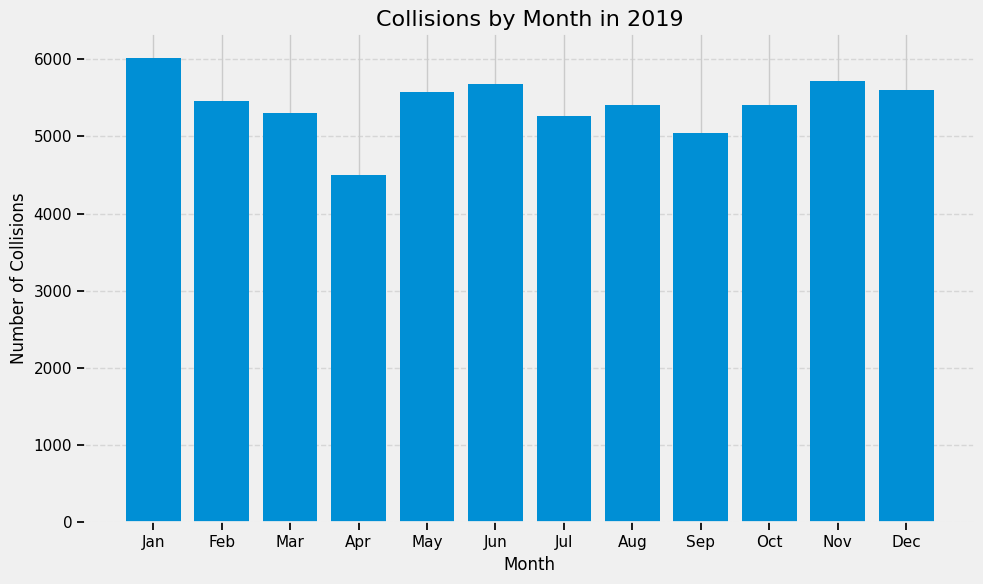

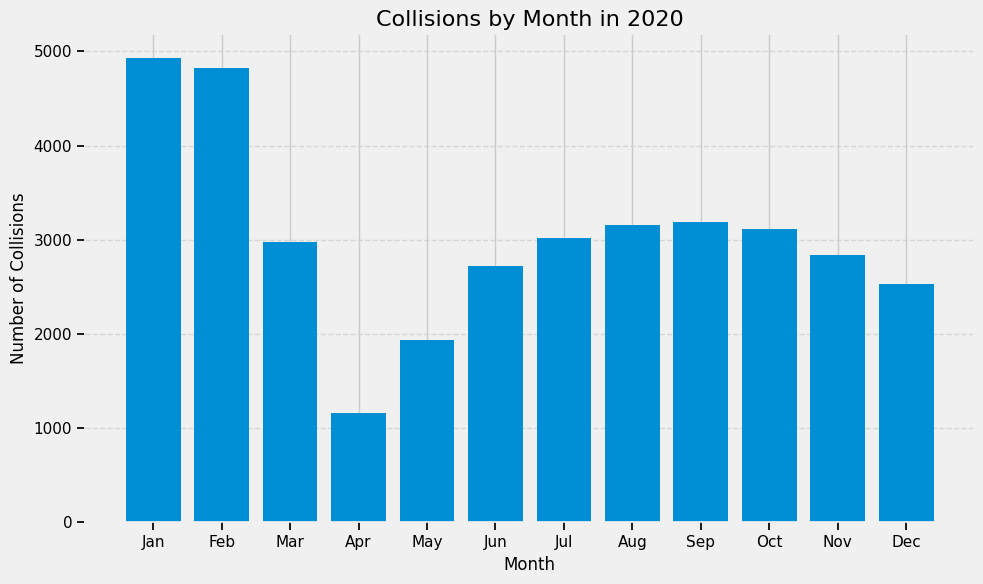

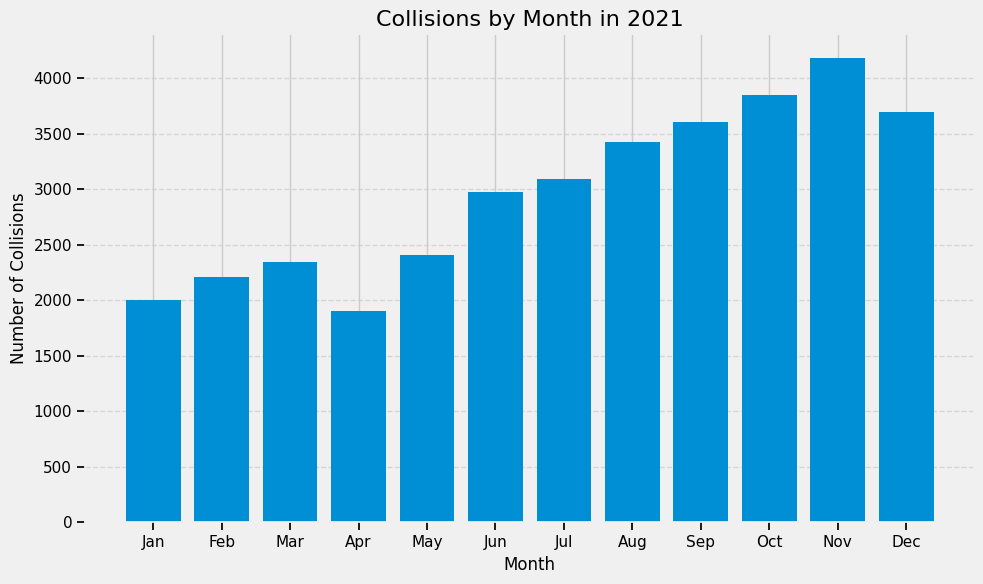

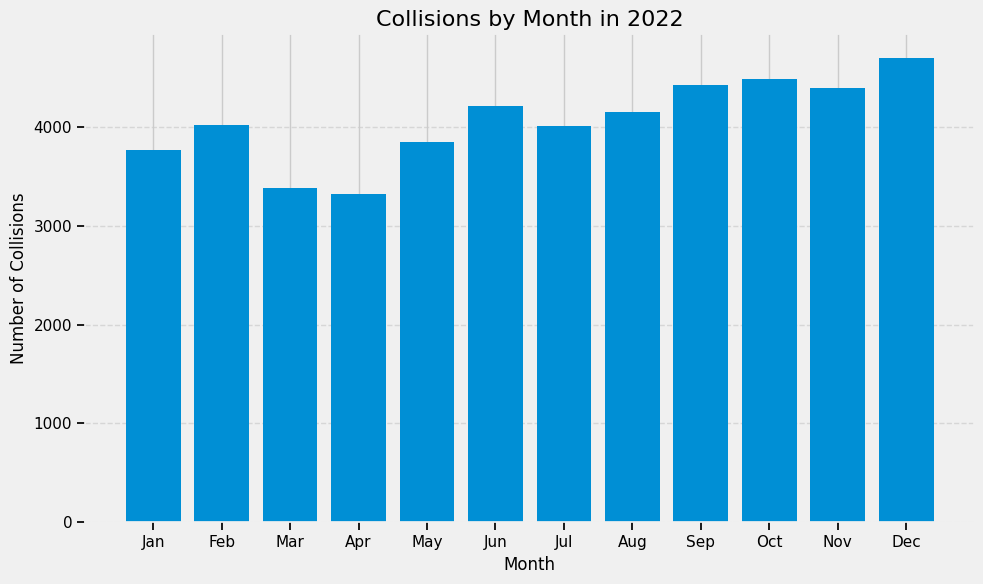

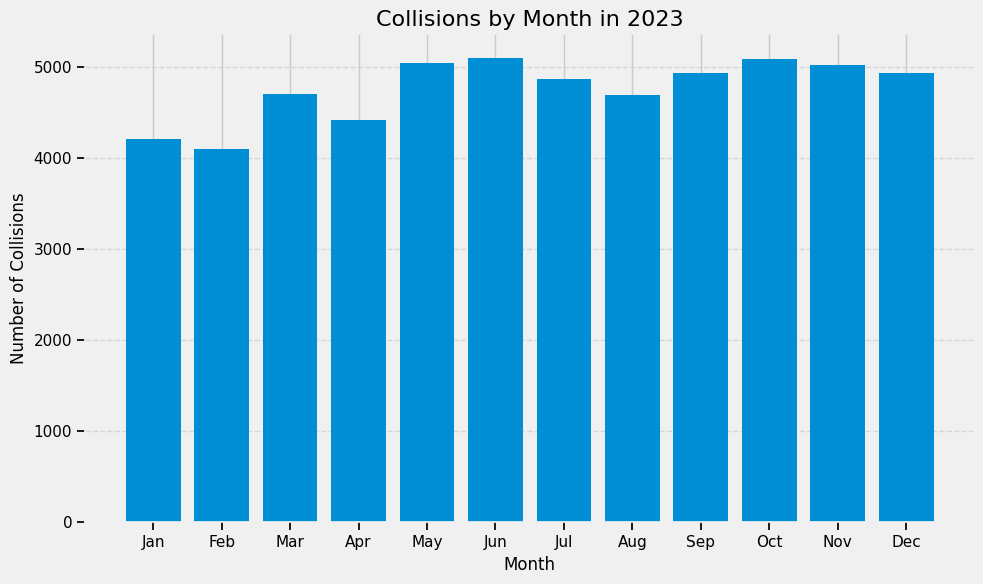

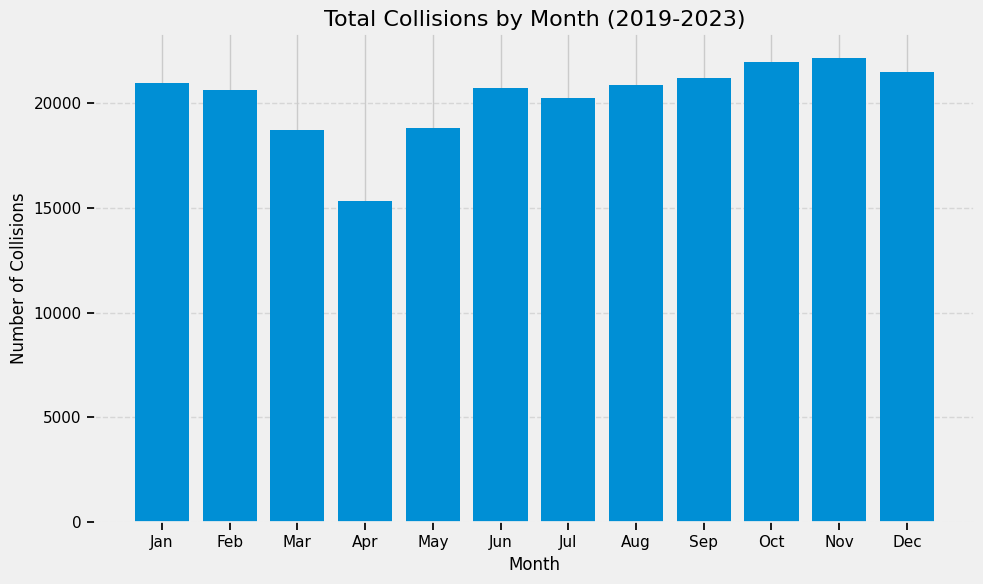

In [39]:
# Group collisions by year and month
monthly_collisions = collision_table.groupby(['Year', 'Month']).size().reset_index(name='Number of Collisions')

# Generate graphs for each year
years = range(2019, 2024)
for year in years:
    yearly_data = monthly_collisions[monthly_collisions['Year'] == year]
    
    plt.figure(figsize=(10, 6))
    plt.bar(yearly_data['Month'], yearly_data['Number of Collisions'])
    plt.title(f'Collisions by Month in {year}', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Collisions', fontsize=12)
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Overall graph for 2019 to 2023
overall_monthly_collisions = monthly_collisions.groupby('Month')['Number of Collisions'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(overall_monthly_collisions['Month'], overall_monthly_collisions['Number of Collisions'])
plt.title('Total Collisions by Month (2019-2023)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Collisions', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Collisions Across all Wards Day of the Week

In [40]:
# Ensure the 'DATE' column is in datetime format
collision_table['DATE'] = pd.to_datetime(collision_table['DATE'])

# Extract the day of the week for grouping
collision_table['Day of Week'] = collision_table['DATE'].dt.day_name()

# Group collisions by day of the week (across all years from 2019 to 2023)
overall_daily_collisions = collision_table.groupby('Day of Week').size().reset_index(name='Number of Collisions')

# Calculate the total number of collisions for the percentage calculation
total_collisions = overall_daily_collisions['Number of Collisions'].sum()
overall_daily_collisions['Percentage of Collisions'] = (overall_daily_collisions['Number of Collisions'] / total_collisions) * 100

# Sort the days of the week in chronological order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
overall_daily_collisions['Day of Week'] = pd.Categorical(overall_daily_collisions['Day of Week'], categories=day_order, ordered=True)
overall_daily_collisions = overall_daily_collisions.sort_values('Day of Week')

# Display the overall table for days of the week
overall_daily_collisions.head(7)

Day of Week  Number of Collisions  Percentage of Collisions
1      Monday                 32100                 13.214444
5     Tuesday                 36520                 15.034004
6   Wednesday                 37141                 15.289647
4    Thursday                 38402                 15.808757
0      Friday                 40601                 16.714008
2    Saturday                 32502                 13.379934
3      Sunday                 25650                 10.559206

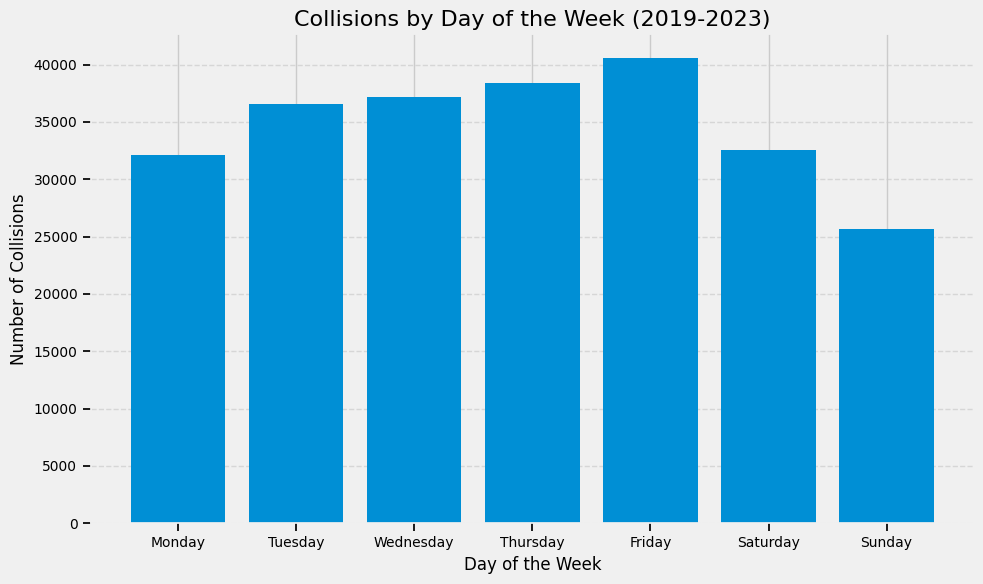

In [41]:
# Plot collisions by day of the week
plt.figure(figsize=(10, 6))
plt.bar(overall_daily_collisions['Day of Week'], overall_daily_collisions['Number of Collisions'])
plt.title('Collisions by Day of the Week (2019-2023)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Collisions', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [42]:
# Ensure the 'DATE' column is in datetime format
collision_table['DATE'] = pd.to_datetime(collision_table['DATE'])

# Extract the day of the week
collision_table['Day of Week'] = collision_table['DATE'].dt.day_name()

# Group collisions by Ward Number and Day of the Week
ward_daily_collisions = collision_table.groupby(['Ward_Number', 'Day of Week']).size().reset_index(name='Number of Collisions')

# Pivot the table so days of the week are columns and wards are rows
ward_daily_pivot = ward_daily_collisions.pivot(index='Ward_Number', columns='Day of Week', values='Number of Collisions').fillna(0)

# Sort columns (days of the week) in chronological order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ward_daily_pivot = ward_daily_pivot[day_order]

# Add a total column for each ward
ward_daily_pivot['Total Collisions'] = ward_daily_pivot.sum(axis=1)

# Display the table for collisions by ward
ward_daily_pivot.head(25)  

Day of Week  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
Ward_Number                                                                   
01             1633     1632       1671      1782    1949      1479    1179   
02              920     1057       1090      1152    1101       808     654   
03             1617     1826       1867      1866    2012      1619    1254   
04             1101     1365       1375      1487    1442      1326    1051   
05             1276     1502       1573      1592    1811      1463    1213   
06             1523     1752       1690      1748    1919      1440    1092   
07             1208     1300       1412      1410    1607      1150     973   
08             1331     1547       1509      1677    1553      1237     993   
09             1044     1158       1213      1375    1404      1224     966   
10             2060     2523       2602      2712    2978      2701    2030   
11             1378     1685       1724      1749    1795      1384    1134   
12             1083     1223       1288      1340    1309       955     740   
13             1404     1673       1590      1686    1759      1399     996   
14             1313     1495       1525      1579    1598      1315    1086   
15             1136     1325       1431      1427    1290       999     810   
16             1176     1377       1424      1462    1467      1138     866   
17             1007     1091       1206      1192    1258       980     783   
18              930     1088       1089      1053    1176       856     670   
19              933     1093       1084      1099    1139       830     734   
20             1321     1437       1425      1397    1528      1247    1088   
21             2224     2501       2478      2609    2964      2370    1802   
22             1075     1187       1284      1227    1359      1048     781   
23             1436     1435       1439      1525    1721      1433    1079   
24             1110     1259       1220      1265    1388      1135     880   
25              760      867        816       889     949       844     705   

Day of Week  Total Collisions  
Ward_Number                    
01                      11325  
02                       6782  
03                      12061  
04                       9147  
05                      10430  
06                      11164  
07                       9060  
08                       9847  
09                       8384  
10                      17606  
11                      10849  
12                       7938  
13                      10507  
14                       9911  
15                       8418  
16                       8910  
17                       7517  
18                       6862  
19                       6912  
20                       9443  
21                      16948  
22                       7961  
23                      10068  
24                       8257  
25                       5830

### Collisions across all Ward for Time of Day

In [43]:
# Group collisions by time of the day
time_of_day_collisions = collision_table.groupby('TIME_OF_DAY').size().reset_index(name='Number of Collisions')

# Calculate the total number of collisions for the percentage calculation
total_collisions = time_of_day_collisions['Number of Collisions'].sum()
time_of_day_collisions['Percentage of Collisions'] = (time_of_day_collisions['Number of Collisions'] / total_collisions) * 100

# Sort the time of day categories in logical order
time_order = ['Morning (5 AM - 12 PM)', 'Afternoon (12 PM - 5 PM)', 'Evening (5 PM - 9 PM)', 'Night (9 PM - 5 AM)']
time_of_day_collisions['TIME_OF_DAY'] = pd.Categorical(time_of_day_collisions['TIME_OF_DAY'], categories=time_order, ordered=True)
time_of_day_collisions = time_of_day_collisions.sort_values('TIME_OF_DAY')

time_of_day_collisions.head(7)

TIME_OF_DAY  Number of Collisions  Percentage of Collisions
2    Morning (5 AM - 12 PM)                 67405                 27.748275
0  Afternoon (12 PM - 5 PM)                 88701                 36.515092
1     Evening (5 PM - 9 PM)                 55517                 22.854402
3       Night (9 PM - 5 AM)                 31293                 12.882231

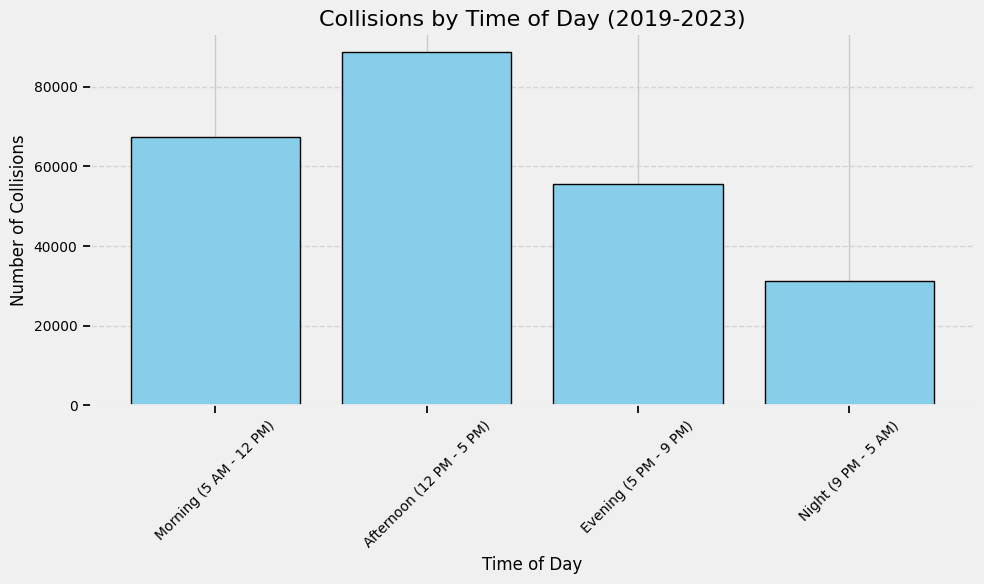

In [44]:
# Plot collisions by time of the day
plt.figure(figsize=(10, 6))
plt.bar(
    time_of_day_collisions['TIME_OF_DAY'], 
    time_of_day_collisions['Number of Collisions'], 
    color='skyblue', 
    edgecolor='black'
)

# Add a title and labels
plt.title('Collisions by Time of Day (2019-2023)', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Collisions', fontsize=12)

# Customize tick labels
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()